#***Sentiment analysis***. This is a continuation from my work for a Big Data postgraduate degree project. The previous dataset was a 2018 version

#### Some initial explorations of the dataset. The actual pipeline is below

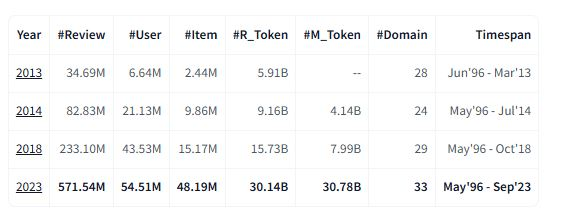

In [1]:
import datasets
datasets.logging.set_verbosity_error()

In [2]:
!pip install datasets==3.6.0

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 4, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/build_env.py", line 15, in <module>
    from pip._vendor.packaging.requirements import Requirement
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/packaging/requirements.py", line 8, in <module>
    from ._parser import parse_requirement as _parse_requirement
  File "/usr/local/lib/python3.12/dist-package

In [3]:
from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'McAuley-Lab/Amazon-Reviews-2023' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
ERROR:datasets.load:`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'McAuley-Lab/Amazon-Reviews-2023' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


KeyboardInterrupt: 

In [ ]:
dataset

In [ ]:
dataset['full'][0]

In [ ]:
### Some Exploratory Analysis & Data Manipulations

In [ ]:
asin_dataset = dataset.filter(lambda example: example["user_id"]=="AGKHLEW2SOWHNMFQIJGBECAF7INQ")

In [ ]:
asin_dataset

In [ ]:
asin_dataset['full'][:] ## to view contents of the dataset

In [ ]:
import pandas as pd


pd.DataFrame(asin_dataset['full'][:])

In [ ]:
dataset1 = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

In [ ]:
dataset2 = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Amazon_Fashion", trust_remote_code=True)

In [ ]:
type(dataset2['full'])

In [ ]:
!pip install datasets_sql

In [ ]:
from datasets import load_dataset, Dataset
from datasets_sql import query

In [ ]:
ds2=dataset2['full']

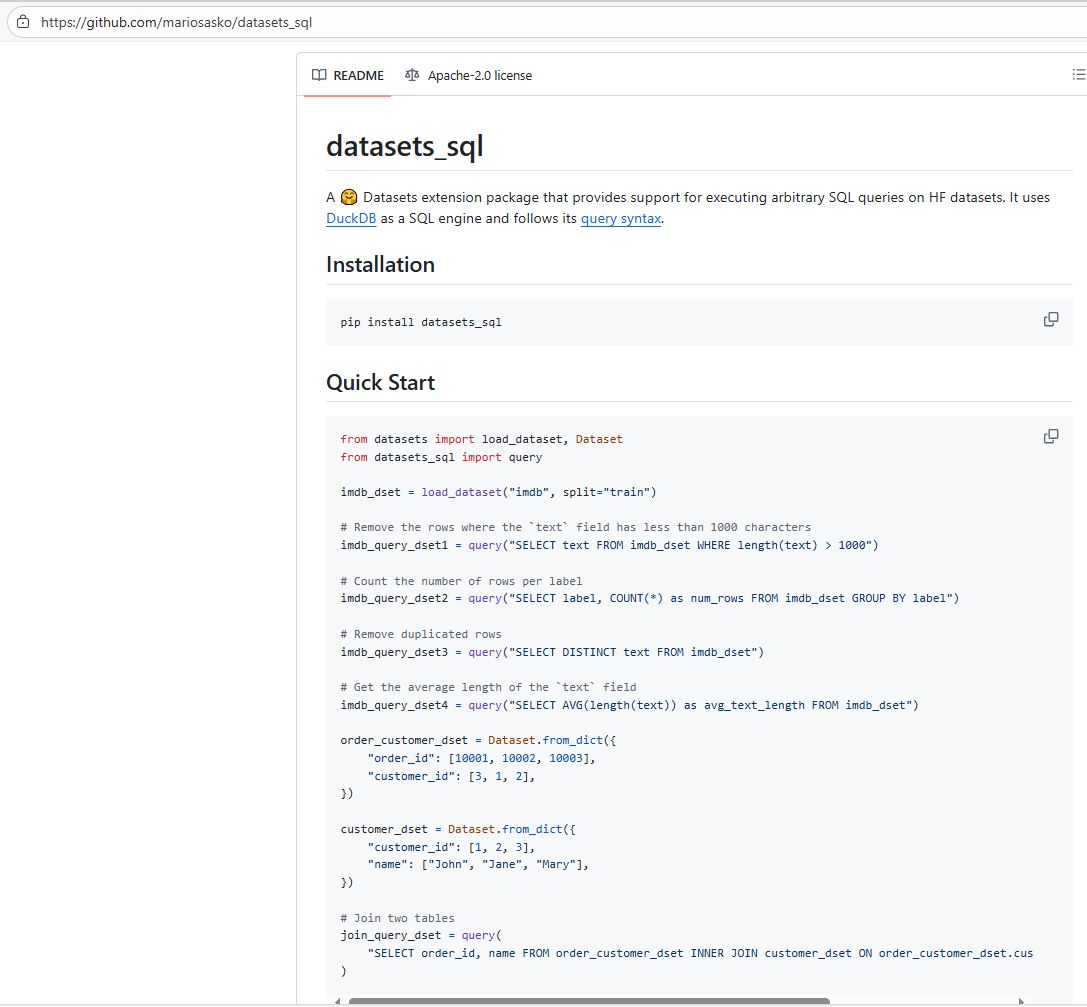

In [ ]:
# Count the number of rows per label
imdb_query_dset2 = query("SELECT rating, COUNT(*) as num_rows FROM ds2 GROUP BY rating ORDER BY num_rows")

In [ ]:
pd.DataFrame(imdb_query_dset2[:])

In [ ]:
from datasets import load_dataset

In [ ]:
dataset_start = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True, split='full')

In [ ]:
dataset_start

In [ ]:
shuffled_dataset = dataset_start.shuffle(seed=42)
shuffled_dataset[:10]

In [ ]:
dataset_emptyFiltered = shuffled_dataset.filter(lambda example: all(value is not None and value != "" for value in example.values()))

In [ ]:
len(dataset_emptyFiltered), len(shuffled_dataset)

In [ ]:
len(shuffled_dataset) - len(dataset_emptyFiltered)

In [ ]:
dataset_emptyFiltered1 = shuffled_dataset.filter(lambda example: all(value is  None or value == "" for value in example.values()))

In [ ]:
dataset_emptyFiltered1

In [ ]:
dataset_emptyFiltered2 = shuffled_dataset.filter(lambda example: any(value is None or value == "" for value in example.values()))

In [ ]:
dataset_emptyFiltered2[9]

In [ ]:
len(dataset_emptyFiltered2)

In [ ]:
dataset_emptyFiltered3 = shuffled_dataset.filter(lambda example: example['text'] is None or example['text'] == "")

In [ ]:
len(dataset_emptyFiltered3)

In [ ]:
# # Define a lambda function to check if any value in a row is empty
# # This is a generic example, you might need to adjust it based on what "empty" means for each column
# filter_empty_rows = lambda example: all(value is not None and value != "" for value in example.values())

# # Apply the filter to the dataset
# filtered_dataset = shuffled_dataset.filter(filter_empty_rows)

# # Display the filtered dataset
# print(filtered_dataset)

In [ ]:
dataset_emptyFiltered1 = shuffled_dataset.filter(lambda example: example['text'] is not None and example['text'] != "")

In [ ]:
dataset_emptyFiltered3 = shuffled_dataset.filter(lambda example: example['text'] is None or example['text'] == "")

In [ ]:
len(dataset_emptyFiltered3), len(dataset_emptyFiltered1), len(shuffled_dataset) - len(dataset_emptyFiltered1)

In [ ]:
ds_sampled = dataset_emptyFiltered1.train_test_split(test_size=0.1, shuffle=True)

In [ ]:
len(ds_sampled['train']), len(ds_sampled['test'])

In [ ]:
from datasets import concatenate_datasets
dataset_cc = concatenate_datasets([ds_sampled['test'], dataset_emptyFiltered3])

In [ ]:
dataset

In [ ]:
!pip install datasets==3.6.0

##Actual Pipeline

##### The below is on ``` Dataset ``` object - i.e. Sequential, not Streaming. This dataset is too large to process it this way. --> Results in a OOm error for disk space. Hence, lower there is version for extracting using streaming / ``` IterableDataset ```.

Therefore, I comment out the code corresponding to ``` Dataset ``` operations below.

In [9]:
# categories_list = ['All_Beauty',
# 'Amazon_Fashion',
# 'Appliances',
# 'Arts_Crafts_and_Sewing',
# 'Automotive',
# 'Baby_Products',
# 'Beauty_and_Personal_Care',
# 'Books',
# 'CDs_and_Vinyl',
# 'Cell_Phones_and_Accessories',
# 'Clothing_Shoes_and_Jewelry',
# 'Digital_Music',
# 'Electronics',
# 'Gift_Cards',
# 'Grocery_and_Gourmet_Food',
# 'Handmade_Products',
# 'Health_and_Household',
# 'Health_and_Personal_Care',
# 'Home_and_Kitchen',
# 'Industrial_and_Scientific',
# 'Kindle_Store',
# 'Magazine_Subscriptions',
# 'Movies_and_TV',
# 'Musical_Instruments',
# 'Office_Products',
# 'Patio_Lawn_and_Garden',
# 'Pet_Supplies',
# 'Software',
# 'Sports_and_Outdoors',
# 'Subscription_Boxes',
# 'Tools_and_Home_Improvement',
# 'Toys_and_Games',
# 'Video_Games',
# 'Unknown']


# categories_list_with_prefix = ["raw_review_" + category for category in categories_list]


# def extract_datasets(dataset): #
#   dataset_nonEmptyText = dataset.filter(lambda example: example['text'] is not None and example['text'] != "")
#   dataset_emptyText = dataset.filter(lambda example: example['text'] is None or example['text'] == "")
#   dataset_sampled = dataset_nonEmptyText.train_test_split(test_size=10000, shuffle=True)
#   dataset_cc = concatenate_datasets([dataset_sampled['test'], dataset_emptyText])
#   return dataset_cc


# dataset_start = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True, split='full')


# for i in categories_list_with_prefix:
#   if i == "raw_review_All_Beauty":
#     dataset_start = extract_datasets(dataset_start)
#     continue
#   dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", i, trust_remote_code=True, split='full')
#   dataset = extract_datasets(dataset)
#   dataset_cc = concatenate_datasets([dataset_start, dataset])

raw/review_categories/All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/701528 [00:00<?, ? examples/s]

Filter:   0%|          | 0/701528 [00:00<?, ? examples/s]

raw/review_categories/Amazon_Fashion.jso(…):   0%|          | 0.00/1.05G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/2500939 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2500939 [00:00<?, ? examples/s]

raw/review_categories/Appliances.jsonl:   0%|          | 0.00/929M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/2128605 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2128605 [00:00<?, ? examples/s]

raw/review_categories/Arts_Crafts_and_Se(…):   0%|          | 0.00/3.95G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/8966758 [00:00<?, ? examples/s]

KeyboardInterrupt: 

##### Pipeline using the ``` IterableDataset ``` object - also an MVP here

In [5]:
!pip install datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [1]:
categories_list = ['All_Beauty',
'Amazon_Fashion',
'Appliances',
'Arts_Crafts_and_Sewing',
'Automotive',
'Baby_Products',
'Beauty_and_Personal_Care',
'Books',
'CDs_and_Vinyl',
'Cell_Phones_and_Accessories',
'Clothing_Shoes_and_Jewelry',
'Digital_Music',
'Electronics',
'Gift_Cards',
'Grocery_and_Gourmet_Food',
'Handmade_Products',
'Health_and_Household',
'Health_and_Personal_Care',
'Home_and_Kitchen',
'Industrial_and_Scientific',
'Kindle_Store',
'Magazine_Subscriptions',
'Movies_and_TV',
'Musical_Instruments',
'Office_Products',
'Patio_Lawn_and_Garden',
'Pet_Supplies',
'Software',
'Sports_and_Outdoors',
'Subscription_Boxes',
'Tools_and_Home_Improvement',
'Toys_and_Games',
'Video_Games',
'Unknown']


categories_list_with_prefix = ["raw_review_" + category for category in categories_list]

In [2]:
import random

def sample_stream(dataset, sample_size=10000, seed=40):
    random.seed(seed)
    buffer = []
    for i, example in enumerate(dataset):
        if len(buffer) < sample_size:
            buffer.append(example)
        else:
            j = random.randint(0, i)
            if j < sample_size:
                buffer[j] = example
    for ex in buffer:
        yield ex

In [3]:
from datasets import load_dataset, concatenate_datasets
from datasets import IterableDataset, Features, Sequence, Value

def extract_datasets_streaming(dataset):
    # Filter directly in streaming mode
    # dataset_img = dataset.filter(lambda ex: len(ex['images'])>0 and ex['images'] is not None) # condition for images field to be non-empty (could consider empty fields as well later))

    # image_features = Sequence(feature={'attachment_type': Value(dtype='string', id=None),
    #                                 'large_image_url': Value(dtype='string', id=None),
    #                                 'medium_image_url': Value(dtype='string', id=None),
    #                                 'small_image_url': Value(dtype='string', id=None)},
    #                           length=-1, id=None)

    # Cast the 'images' column to the defined feature structure
    #dataset = dataset.cast_column("images", image_features)
    #dataset = dataset.filter(lambda ex: len(ex['images'])>0 and ex['images'] is not None) # condition for images field to be non-empty (could consider empty fields as well later))
    dataset = dataset.remove_columns(set(["images"]))


    dataset_nonEmptyText = dataset.filter(lambda ex: ex['text'] is not None and (isinstance(ex['text'], str) and ex['text'].strip() != "")) #
    dataset_emptyText = dataset.filter(lambda ex: ex['text'] is None or (isinstance(ex['text'], str) and ex['text'].strip() == "")) #

    # ⚠️ train_test_split is not available in streaming mode!
    # Instead, we can approximate a sample using take() or itertools.islice
    from itertools import islice
    dataset_sampled = dataset_nonEmptyText.shuffle(seed=40).take(1000)  # first 10k examples as "sample"

    # Concatenate datasets lazily
    dataset_cc = dataset_sampled #concatenate_datasets([dataset_sampled, dataset_emptyText])
    return dataset_cc

In [4]:
import time
start_time = time.time()
print(start_time)

# Load the first category as a streaming dataset
dataset_start = load_dataset(
    "McAuley-Lab/Amazon-Reviews-2023",
    "raw_review_All_Beauty",
    trust_remote_code=True,
    split='full',
    streaming=True
)

dataset_extract = extract_datasets_streaming(dataset_start)

# Iterate over other categories
for i in categories_list_with_prefix:
    if i == "raw_review_All_Beauty":
        continue  # already processed above

    print(i)
    dataset_loaded = load_dataset(
        "McAuley-Lab/Amazon-Reviews-2023",
        i,
        trust_remote_code=True,
        split='full',
        streaming=True
    )
    dataset = extract_datasets_streaming(dataset_loaded)

    # Concatenate iterables
    dataset_start = concatenate_datasets([dataset_extract, dataset])


print("--- %s seconds ---" % (time.time() - start_time))

1762104755.537988


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

raw_review_Amazon_Fashion
raw_review_Appliances
raw_review_Arts_Crafts_and_Sewing
raw_review_Automotive
raw_review_Baby_Products
raw_review_Beauty_and_Personal_Care
raw_review_Books
raw_review_CDs_and_Vinyl
raw_review_Cell_Phones_and_Accessories
raw_review_Clothing_Shoes_and_Jewelry
raw_review_Digital_Music
raw_review_Electronics
raw_review_Gift_Cards
raw_review_Grocery_and_Gourmet_Food
raw_review_Handmade_Products
raw_review_Health_and_Household
raw_review_Health_and_Personal_Care
raw_review_Home_and_Kitchen
raw_review_Industrial_and_Scientific
raw_review_Kindle_Store
raw_review_Magazine_Subscriptions
raw_review_Movies_and_TV
raw_review_Musical_Instruments
raw_review_Office_Products
raw_review_Patio_Lawn_and_Garden
raw_review_Pet_Supplies
raw_review_Software
raw_review_Sports_and_Outdoors
raw_review_Subscription_Boxes
raw_review_Tools_and_Home_Improvement
raw_review_Toys_and_Games
raw_review_Video_Games
raw_review_Unknown
--- 87.80917191505432 seconds ---


##### some methods for exploring / checking the ``` IterableDataset ```

In [16]:
next(iter(dataset))['text']

'This is a great smart switch. First, it was super easy to install (I actually did it myself by first watching a YouTube video on it and then by following the included instructions). Second, getting it connected to Alexa was a breeze. Within 15 minutes or so, I was good to go and was turning my light with voice commands. Highly recommend especially for those technically challenged people like me. I am going to purchase a dimmer next, hopefully it will go just as smoothly.'

In [ ]:
import numpy as np

for i in np.arange(1000, 700_000, 1000):
  #i=i*1000
  print(i)
  dataset_sampled = dataset_start.take(i)
  dataset = dataset_sampled.filter(lambda ex: len(ex['images'])>0 and ex['images'] is not None) # condition for images field to be non-empty (could consider empty fields as well later))
  dataset_nonEmptyText = dataset.filter(lambda ex: ex['text'] is not None and ex['text'].strip() != "") #

In [9]:
# Iterate through the streaming dataset and print the text of the first few examples
for i, example in enumerate(dataset):
    print(example['text'])
    if i >= 5:  # Print only the first 6 examples
        break

This is a great smart switch. First, it was super easy to install (I actually did it myself by first watching a YouTube video on it and then by following the included instructions). Second, getting it connected to Alexa was a breeze. Within 15 minutes or so, I was good to go and was turning my light with voice commands. Highly recommend especially for those technically challenged people like me. I am going to purchase a dimmer next, hopefully it will go just as smoothly.
I only had a small collection of his songs. This came out on sale and had some of the best songs I loved to play.<br />I'm back up to speed with this disc and the ones I had collected earlier.<br />Not sure why I ever gave my son my old phono player and my albums - which he no longer owns.
If I could leave no stars I would. This balloon would not stay inflated or float. Not cool for my sons golden birthday...SAD
Arrived promptly, price is great and it works great with my iPhone 6s+ and wife's iPhone 6+. Having an extra

In [10]:
# Iterate through the streaming dataset and print the text of the first few examples
for i, example in enumerate(dataset):
    print(example)
    if i >= 5:  # Print only the first 6 examples
        break

{'rating': 5.0, 'title': 'Easy to install, easy to use, just great!', 'text': 'This is a great smart switch. First, it was super easy to install (I actually did it myself by first watching a YouTube video on it and then by following the included instructions). Second, getting it connected to Alexa was a breeze. Within 15 minutes or so, I was good to go and was turning my light with voice commands. Highly recommend especially for those technically challenged people like me. I am going to purchase a dimmer next, hopefully it will go just as smoothly.', 'asin': 'B07H5FSY64', 'parent_asin': 'B07H5FSY64', 'user_id': 'AFSKPY37N3C43SOI5IEXEK5JSIYA', 'timestamp': 1546539935490, 'helpful_vote': 0, 'verified_purchase': False}
{'rating': 5.0, 'title': 'Santana can play', 'text': "I only had a small collection of his songs. This came out on sale and had some of the best songs I loved to play.<br />I'm back up to speed with this disc and the ones I had collected earlier.<br />Not sure why I ever ga

In [17]:
dataset

IterableDataset({
    features: ['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_shards: 1
})

In [ ]:
# from datasets import load_dataset, concatenate_datasets
# from datasets import IterableDataset, Features, Sequence, Value

# def extract_datasets_streaming(dataset):
#     # Define a consistent feature structure for the 'images' column
#     image_features = Sequence(feature={'attachment_type': Value(dtype='string', id=None),
#                                        'large_image_url': Value(dtype='string', id=None),
#                                        'medium_image_url': Value(dtype='string', id=None),
#                                        'small_image_url': Value(dtype='string', id=None)},
#                                  length=-1, id=None)

#     # Cast the 'images' column to the defined feature structure
#     dataset = dataset.cast_column("images", image_features)

#     # Filter directly in streaming mode
#     dataset_nonEmptyText = dataset.filter(lambda ex: ex['text'] is not None and ex['text'].strip() != "")
#     dataset_emptyText = dataset.filter(lambda ex: ex['text'] is None or ex['text'].strip() == "")

#     # ⚠️ train_test_split is not available in streaming mode!
#     # Instead, we can approximate a sample using take() or itertools.islice
#     from itertools import islice
#     dataset_sampled = dataset_nonEmptyText.shuffle(seed=42).take(10000)  # first 10k examples as "sample", after shuffling

#     # Concatenate datasets lazily
#     dataset_cc = concatenate_datasets([dataset_sampled, dataset_emptyText])
#     return dataset_cc

In [12]:
dataset_start

IterableDataset({
    features: ['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_shards: 1
})

In [13]:
for example in dataset_start:
    print(example)
    break

{'rating': 3.0, 'title': 'Fairly well made but very small', 'text': "These caps are very small. Even though my hair length is short, the cap barely covers my head. If I had hair longer than my collar, it wouldn't fit at all.", 'asin': 'B07PFJNVSY', 'parent_asin': 'B07PFJNVSY', 'user_id': 'AH5KJVUUL3UMJMTCSHPHGBQAZHOQ', 'timestamp': 1574980368028, 'helpful_vote': 1, 'verified_purchase': True}


In [18]:
next(iter(dataset_start))

{'rating': 3.0,
 'title': 'Fairly well made but very small',
 'text': "These caps are very small. Even though my hair length is short, the cap barely covers my head. If I had hair longer than my collar, it wouldn't fit at all.",
 'asin': 'B07PFJNVSY',
 'parent_asin': 'B07PFJNVSY',
 'user_id': 'AH5KJVUUL3UMJMTCSHPHGBQAZHOQ',
 'timestamp': 1574980368028,
 'helpful_vote': 1,
 'verified_purchase': True}

##### Converting to a ```Dataset ``` - necessary for further analysis

In [5]:
from datasets import Dataset
start_time = time.time()
print(start_time)

# converting from Iterable Dataset to a Dataset

# Take a subset (to avoid OOM)
subset = dataset_start.take(10_000)  # takes first 10k examples

# Materialize into a list of dicts
data = list(subset)

# Convert to a regular in-memory Dataset
dataset = Dataset.from_list(data)

print("--- %s seconds ---" % (time.time() - start_time))

1762104843.3542175
--- 1.8079729080200195 seconds ---


##### As usual - some checks (hidden)

In [25]:
1341/60

22.35

In [188]:
dataset['text']

["These caps are very small. Even though my hair length is short, the cap barely covers my head. If I had hair longer than my collar, it wouldn't fit at all.",
 "I agree 100% with previous review. Exactly what I was about to say. I found this at TJMAXX and bought it to use on chest - to save more expensive small bottle retinol's for neck/face.  Now I put it under eyes and on neck in the AM...Saving Retinol for use only at night. I will check at store to repurchase - I hate shipping chrgs. (Amazon doesnt stock much so we have to pay to ship?? No thanks)",
 'I love this combo package, particularly the flosser. This makes a great gift package for someone you love, giving them everything they need to keep their mouth/gum health optimal. I have had issues (particularly gums) for the past 5 years. No ones fault but my own for not taking care of my mouth the way I should have all these years. This flosser is great. I fill it with Act Restoring mouthwash and use it after brushing. It amazes me

In [189]:
dataset[1]

{'rating': 5.0,
 'title': 'Altaire Paris Ceam',
 'text': "I agree 100% with previous review. Exactly what I was about to say. I found this at TJMAXX and bought it to use on chest - to save more expensive small bottle retinol's for neck/face.  Now I put it under eyes and on neck in the AM...Saving Retinol for use only at night. I will check at store to repurchase - I hate shipping chrgs. (Amazon doesnt stock much so we have to pay to ship?? No thanks)",
 'asin': 'B005LFNUF6',
 'parent_asin': 'B005LFNUF6',
 'user_id': 'AFFCQNWCHXTY7BANIWXLP5C2BKPA',
 'timestamp': 1373270523000,
 'helpful_vote': 0,
 'verified_purchase': False}

##### Train-test- split - should think how to do it at an earlier stage, just after loading the data to avoid data leakage as much as possible

In [6]:
dataset = dataset.train_test_split(test_size=0.1, shuffle=True)

#####Some Exploratory Analysis

In [10]:
df_train = dataset['train'].to_pandas()

In [11]:
df_train.head(5)

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,There garbage bags!,They are garbage bags really can't say much more,B073JWBX3W,B073JWBX3W,AGPR2UDFIJJCBA3EKFEEAJBWKROQ,1531839895429,0,True
1,3.0,good and catchy,"heard it in the movie, was catchy enough to ad...",B007IGNGNC,B007IGNGNC,AG35BKPUEUMX7LV5YLOQ5YCQ3GOA,1364584993000,0,True
2,5.0,divided corelle plates,I purchased these because I have a grandson wh...,B00G4D73A2,B00G4D73A2,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1558496206743,0,True
3,4.0,Same size but one is much small,"It is a pretty shirt. But the sizes run small,...",B08FYF4YFB,B08FYF4YFB,AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,1608041235016,0,True
4,5.0,Incredible hair serum - just everything right ...,This is a fantastic Leave-in hair serum. It is...,B077MYW993,B077MYW993,AEZP6Z2C5AVQDZAJECQYZWQRNG3Q,1601012103409,0,False


In [12]:
df_train['rating'].value_counts(normalize=True).reset_index().sort_values(by='rating')

,rating,proportion
3,1.0,0.066667
4,2.0,0.055556
2,3.0,0.091111
1,4.0,0.180556
0,5.0,0.606111


In [13]:
df_train['rating'].value_counts().reset_index().sort_values(by='rating')

,rating,count
3,1.0,120
4,2.0,100
2,3.0,164
1,4.0,325
0,5.0,1091


In [14]:
df_train.shape

(1800, 9)

In [15]:
def Plot_Counts_loanStatus(df, col):

    '''
    helper function - plots the countplot, wrapped up in the function only to make the final preprocessing code clearer

    '''
    plt.figure(figsize=(14,6))

    loan_status = df[col].value_counts()
    loan_status_plot = sn.countplot(x=col, data=df,order=loan_status.index)
    loan_status_plot.set_title("Loan Status Counts ", fontsize=25)
    loan_status_plot.set_xlabel("Status", fontsize=15)
    loan_status_plot.set_ylabel("Count", fontsize=15)
    loan_status_plot.set_xticklabels(loan_status.index,rotation=45)
    plt.show()

/tmp/ipython-input-2924744144.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  loan_status_plot.set_xticklabels(loan_status.index,rotation=45)


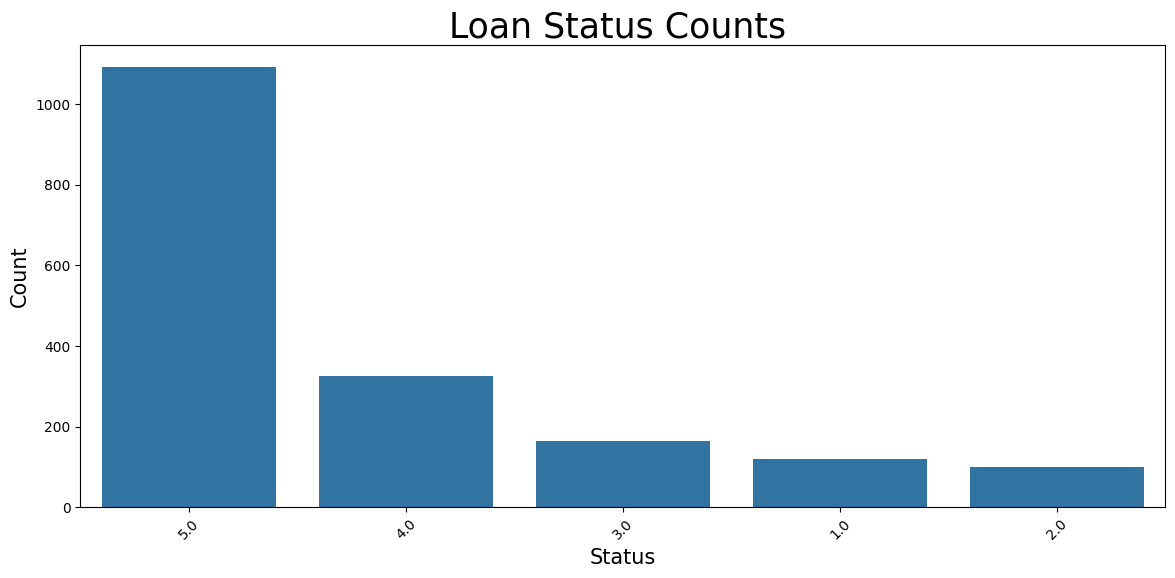

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

Plot_Counts_loanStatus(df=df_train, col='rating')

##### Tokenizing

In [85]:
from transformers import AutoTokenizer

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(batch):
    batch["label"] = [int(r) - 1 for r in batch["rating"]]
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=256)


tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/1800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [147]:


# Some other model

# from transformers import DistilBertTokenizer, DistilBertModel

# model_name = "distilbert-base-uncased"
# tokenizer = DistilBertTokenizer.from_pretrained(model_name)
# model = DistilBertModel.from_pretrained(model_name)

# text = "Replace me by any text you'd like."

# encoded_input = tokenizer(text, return_tensors='pt')
# #output = model(**encoded_input)




##### Trainer

In [8]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.1 MB/s eta 0:00:00


In [9]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
from transformers import TrainingArguments, Trainer
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = predictions.argmax(axis=-1)
    return accuracy.compute(predictions=preds, references=labels)

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    load_best_model_at_end=True,
    logging_steps=100, #needed for training loss log o/w/ 'no log' is printed for some reason
    #save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"].select(range(1500)), #small dataset for dev only
    eval_dataset=tokenized_datasets["test"].select(range(200)), #small dataset for dev only
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-924019669.py:25: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [11]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ambiernat to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.926971,0.615000
2,1.141100,0.840909,0.695000
3,0.810100,0.798673,0.715000
4,0.659000,0.805505,0.705000
5,0.522900,0.810114,0.710000


TrainOutput(global_step=470, training_loss=0.737986317086727, metrics={'train_runtime': 254.4012, 'train_samples_per_second': 29.481, 'train_steps_per_second': 1.847, 'total_flos': 496779321600000.0, 'train_loss': 0.737986317086727, 'epoch': 5.0})

##### Evaluation & Inference

In [87]:
trainer.evaluate()

preds = trainer.predict(tokenized_datasets["test"])
print(preds.metrics)

{'test_loss': 0.7986734509468079, 'test_accuracy': 0.715, 'test_runtime': 1.4322, 'test_samples_per_second': 139.644, 'test_steps_per_second': 4.888}


In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
print(sentiment_pipeline(["I really love this product!", "I so so like this product", "This product could be better", "I don't like this product"]))

In [ ]:
import numpy as np
print(np.std(preds.predictions, axis=0))

In [220]:
preds

PredictionOutput(predictions=array([[-2.09441614e+00, -1.93207228e+00, -8.23147118e-01,
         1.04707623e+00,  2.98906970e+00],
       [-1.83216822e+00, -1.46995890e+00, -2.12195888e-02,
         1.70043182e+00,  1.12307942e+00],
       [-1.06760085e+00, -9.48662162e-01,  8.03260058e-02,
         8.93046081e-01,  7.39319503e-01],
       [-2.05351210e+00, -1.69961512e+00, -4.78495270e-01,
         1.31091022e+00,  2.22774529e+00],
       [-1.94543648e+00, -1.82708144e+00, -6.30377114e-01,
         7.27671742e-01,  3.06655955e+00],
       [-2.12484694e+00, -1.85762179e+00, -7.05534816e-01,
         1.13879073e+00,  2.77501249e+00],
       [-2.12712002e+00, -1.95443308e+00, -7.28583515e-01,
         1.09725785e+00,  3.06355953e+00],
       [-2.08782291e+00, -1.74437237e+00, -4.02736187e-01,
         1.50699925e+00,  2.17977762e+00],
       [-1.48821080e+00, -1.64381564e+00, -9.94803965e-01,
        -5.05015738e-02,  3.47219443e+00],
       [-2.07094121e+00, -1.83947778e+00, -7.58926153

##### Visualisations & Output Checks

In [13]:
# use softmax fctn to convert to probabilities and then choose the class with the highest probability

from scipy.special import softmax
probs = softmax(preds.predictions, axis=1)
predicted_classes = probs.argmax(axis=1)

In [14]:
# inspect output
import pandas as pd
output = pd.merge(pd.DataFrame(preds.label_ids).reset_index().rename(columns={0: 'label_ids'}),
                  pd.DataFrame(preds.predictions).reset_index(), right_on='index', left_on= 'index')

In [15]:
output # note - the reason for the same figures for labels 0 to 4 for all cases was because I previously had a lot of empty 'text' column entries (the majority actually)
# the question remains: where they being assigned RANDOM labels then? probably labels from the initial random initialisation, i.e. not
# labels, but values

,index,label_ids,0,1,2,3,4
0,0,4,-1.820124,-1.568871,-0.975294,0.697126,2.874428
1,1,2,0.606126,0.558328,0.883909,-0.378951,-1.870143
2,2,0,0.412284,0.532579,0.833431,-0.074840,-1.920200
3,3,4,-1.487389,-1.613511,-1.211156,0.093966,3.285795
4,4,2,0.037260,0.234656,0.978873,0.222783,-1.714028
...,...,...,...,...,...,...,...
195,195,4,-1.322745,-1.578545,-1.248362,-0.074440,3.427957
196,196,4,-1.513152,-1.638335,-1.154809,0.122637,3.312828
197,197,3,-1.108459,-0.627245,0.504227,0.870795,0.238566
198,198,4,-1.617850,-1.556250,-1.231266,0.236865,3.278047


In [16]:
# inspect output
output2 = pd.merge(pd.DataFrame(preds.label_ids).reset_index().rename(columns={0: 'actual_label_ids'}),
                  tokenized_datasets["test"].to_pandas()['text'].reset_index(), right_on='index', left_on= 'index')

output2 = pd.merge(output2, pd.DataFrame(predicted_classes).reset_index().rename(columns={0: 'predicted_class'}), right_on='index', left_on= 'index')

In [34]:
pd.set_option('display.max_colwidth', None)
output2

,index,actual_label_ids,text,predicted_class
0,0,4,"I have never tried a full face snorkel mask before (used to only covering my eyes with a foggy mask and have pipe which goes in my mouth). This was a little awkward to get used to but now I really like it. It fits well, no leaks, not overly constrictive on my face and I can snorkel for hours. I love the full viewing capability I get with this full face mask and I also love that it is GoPro compatible (I am planning to buy a GoPro camera in September when I go to the Caribbean). I will update this review to speak to the GoPro matching capability after I return. But, for a snorkel mask, this is really a great one!",4
1,1,4,will be a great birthday gift.,4
2,2,4,Good slip on shoes,4
3,3,4,Smells amazing. Doesn't seem to dry my skin. You know it's getting where it needs to go as it's not long before you taste it,3
4,4,2,"It's nice looking, easy to use but I could still smell garlic and onion a but. It did lessen the smell it seemed.",3
...,...,...,...,...
195,195,3,Great hooks and great value for the money,4
196,196,4,"These bandages have many uses. There are 16 black rolls that are individually wrapped and each roll is 5 yards apiece and 2 inches tall. These self-adhere as the bandage is wrapped around a hand, leg, arm, etc. These stick well. The stretch allows this to be used like kinesiology tape with the exception that one cannot shower with this successfully and each wrap is for one-time use.<br /><br />The entire roll does not have to be used at once as it depends on the amount needed. When used where joints open and close, such as a knee or elbow, the wrap may bunch up in the crease as expected. However, this is perfect to use as a lightweight version of a carpal tunnel brace by wrapping it around a bad wrist, hand, and thumb. It does not stick to my skin nor to a pet's fur, which is wonderful.<br /><br />This is versatile enough to wrap around the handle of a tennis racquet to get a good grip or an umbrella or cane handle. There are just so many useful possibilities besides medical reasons.<br /><br />In summary, because the wraps are two inches wide and are not designed to stick to the skin, it does have a tendency to bunch up if wrapped around a knee or elbow, so it is not perfect for everything. I feel these are great bandages to have in one's medicine cabinet. At the current price of $15.19 ($15.99 minus 5%) it comes to $.95 cents per roll which is on the high side of competitively priced. These are self-adhesive bandages rebranded as tattoo grip tape.",4
197,197,3,"This shampoo is for babies but based on the reviews here I decided to take a chance on it and I'm using it on my hair and so is my teen daughter. I have bleached blonde wavy hair that constantly frizzes in the summer, in the rain, if I don't dry it enough - you get the idea, it is often frizzy. I tried it and it does a great job cleaning my hair and the smell is just amazing. However, I can't say that it's been a real miracle that changed my hair. I mean, I like it but based on some of these reviews, maybe I was just looking for a miracle for bad hair and it isn't, at least for my hair. I accidentally ordered two bottles of this when I intended to order one, and I plan to use them up, but I'd probably try something else after I'm done with the two bottles to see if there is some type of miracle for my dry/frizzy hair.",3
198,198,4,"These are disposable, but biodegradable. So - they are a better choice than plastic. Stainless steel is great - cause it's washable. You can wash these, but they eventually give up - but it's ok to let them go. Sustainable and biodegradable. Having said all of this, I never hesitate to update my reviews should new info seem useful. All of my reviews reflect my honest, personal experience with the reviewed item - your experience may be different. I am not influenced by any outside source. I receive/accept NO free products or discounts that are not available to all shoppers- ever.

In [37]:
import pandas as pd

pd.DataFrame(predicted_classes).value_counts(normalize=True).reset_index().rename(columns={0: 'predicted_class'}).sort_values(by='predicted_class')

,predicted_class,proportion
2,0,0.130
4,1,0.005
3,2,0.020
1,3,0.165
0,4,0.680


In [38]:
pd.DataFrame(predicted_classes).value_counts().reset_index().rename(columns={0: 'predicted_class'}).sort_values(by='predicted_class')

,predicted_class,count
3,0,14
4,1,6
2,2,23
1,3,36
0,4,121


In [17]:
df_predicted = pd.DataFrame(predicted_classes).reset_index().rename(columns={0: 'predicted_class'}).sort_values(by='predicted_class')
df_actual = pd.DataFrame(preds.label_ids).reset_index().rename(columns={0: 'actual_label_ids'})

In [18]:
output3 = output2.drop(['text', 'index'], axis=1)

In [54]:
output3

,actual_label_ids,predicted_class
0,4,4
1,4,4
2,4,4
3,4,3
4,2,3
...,...,...
195,3,4
196,4,4
197,3,3
198,4,0


Make sure the output of trainer.predict() is saved as preds and the tokenised dataset as tokenized_datasets as tokenized_datasets]
File name TEST TARGET CLASS: side-by-side (grouped) bar chart. This is also saved in the EDA folder


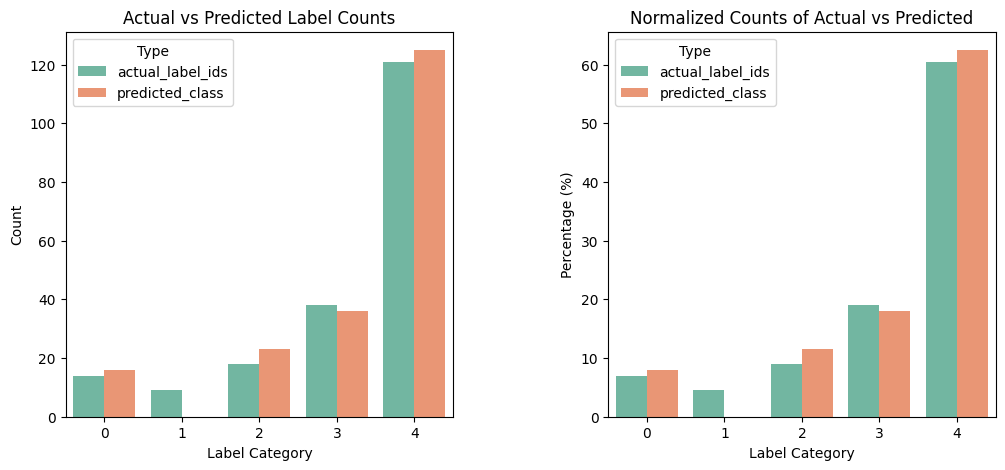

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import softmax
import ast
import os
#

# inputs
print("Make sure the output of trainer.predict() is saved as preds and the tokenised dataset as tokenized_datasets as tokenized_datasets")
preds_inp = preds
tokenized_datasets_inp = tokenized_datasets

# preds_inp = input("Paste the name of the predictions table - trainer.predict() output").strip()
# tokenized_datasets_inp = input("Paste the name of tokenized dataset").strip()


# Create an EDA folder if it doesn't exist
def create_eda_folder():
    current_dir = os.getcwd()

    eda_folder_path = os.path.join(current_dir, 'EDA')
    if not os.path.exists(eda_folder_path):
        os.makedirs(eda_folder_path)

def bar_plots(preds, tokenized_datasets):

    # --- Example context before plotting ---
    # probs and class assignments
    probs = softmax(preds.predictions, axis=1)
    predicted_classes = probs.argmax(axis=1)

    #intermediate calcs
    df_temp1 = pd.merge(pd.DataFrame(preds.label_ids).reset_index().rename(columns={0: 'actual_label_ids'}),
                  tokenized_datasets["test"].to_pandas()['text'].reset_index(), right_on='index', left_on= 'index')
    df_temp1 = pd.merge(df_temp1, pd.DataFrame(predicted_classes).reset_index().rename(columns={0: 'predicted_class'}), right_on='index', left_on= 'index')


    # Melt to long format
    df_melted = df_temp1.melt(
        value_vars=['actual_label_ids', 'predicted_class'],
        var_name='type',
        value_name='label'
    )

    # Normalization for percentage plot
    normalized = (
        df_melted
        .groupby(["type", "label"])
        .size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum() * 100)
    )
    normalized.index = normalized.index.droplevel(level=0)
    normalized = normalized.reset_index(name="Percentage")

    # --- Plotting side-by-side ---
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), squeeze=False)
    plt.subplots_adjust(wspace=0.4)

    # Plot 1: Raw counts
    sns.countplot(
        data=df_melted,
        x='label',
        hue='type',
        palette='Set2',
        ax=axs[0, 0]
    )
    axs[0, 0].set_title("Actual vs Predicted Label Counts")
    axs[0, 0].set_xlabel("Label Category", fontsize=10)
    axs[0, 0].set_ylabel("Count", fontsize=10)
    axs[0, 0].legend(title="Type")

    # Plot 2: Normalized (%)
    sns.barplot(
        data=normalized,
        x="label",
        y="Percentage",
        hue="type",
        palette='Set2',
        ax=axs[0, 1]
    )
    axs[0, 1].set_title("Normalized Counts of Actual vs Predicted")
    axs[0, 1].set_xlabel("Label Category", fontsize=10)
    axs[0, 1].set_ylabel("Percentage (%)", fontsize=10)
    axs[0, 1].legend(title="Type")

plot_to_save = bar_plots(preds=preds_inp, tokenized_datasets = tokenized_datasets_inp)
create_eda_folder()
file_name = 'TEST TARGET CLASS: side-by-side (grouped) bar chart.png'
eda_folder_path = os.path.join(os.getcwd(), 'EDA')

file_path = os.path.join(eda_folder_path, file_name)
#with open(file_path, 'w', encoding = 'utf-8-sig') as f:
plt.savefig(file_path)

#plot_to_save
text_to_display = 'File name '+file_name[:-4] +'. '+'This is also saved in the EDA folder'
print(text_to_display)

In [ ]:
## predicted slightly biased towards 0 and 4 (i.e. very good and very bad ratings), but overall the 'shape' is similar. The model performs fairly well.

In [82]:
!git clone https://github.com/ambiernat/ml_eda.git

fatal: destination path 'ml_eda' already exists and is not an empty directory.


In [62]:
!python /content/ml_eda/column_types.py

Paste path to the training data and press enter (without the '' marks), e.g. /content/drive/MyDrive/Kaggle/kaggle_data/train.csv: Traceback (most recent call last):
  File "/content/ml_eda/column_types.py", line 7, in <module>
    path = input("Paste path to the training data and press enter (without the '' marks), e.g. /content/drive/MyDrive/Kaggle/kaggle_data/train.csv: ").strip()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
^C


In [59]:
output4 = output3.astype({'actual_label_ids': 'str', 'predicted_class': 'str'})

In [61]:
import pandas as pd
import numpy as np
import sys
import os

data = output4

# Create an EDA folder if it doesn't exist
def create_eda_folder():
    current_dir = os.getcwd()

    eda_folder_path = os.path.join(current_dir, 'EDA')
    if not os.path.exists(eda_folder_path):
        os.makedirs(eda_folder_path)

# identifying columns which have different values and so are useless for prediction:
def identifier_cols_fctn(df):
  colnames_return=[]
  for col in df.columns.tolist():
    if len(set(df[col])) == len(df[col]):
      colnames_return.append(col)
    else: pass
    return colnames_return


# identifying columns containing missing values
def missing_val_cols_fctn(df):
  colnames_return=[]
  for col in data.columns.tolist():
    if sum(data[col].isnull()) != 0:
      colnames_return.append(col)
    else: pass
    return colnames_return


def eda_vals_all_cols():
    identifier_cols = identifier_cols_fctn(data)
    #numerical columns
    numerical_cols=list(data.select_dtypes(include='number'))
    # boolean columns
    bool_cols=list(data.select_dtypes(include='bool'))
    # object columns
    object_cols=list(data.select_dtypes(include='object'))
    # category columns
    category_cols=list(data.select_dtypes(include='category'))
    # datetime columns
    datetime_cols=list(data.select_dtypes(include='datetime'))
    #return columns containing missing values
    missing_val_cols=missing_val_cols_fctn(data)
    # return all other column names which were not returned as part of the earlier investigation
    other = list(set(data.columns.tolist()).difference(set(identifier_cols+numerical_cols+bool_cols+object_cols+category_cols+datetime_cols+missing_val_cols)))
    eda_vals=[str(identifier_cols), str(numerical_cols), str(bool_cols), str(object_cols),
              str(category_cols), str(datetime_cols), str(missing_val_cols), str(other)]

    return eda_vals

def main():
    eda_keys=['identifier', 'numerical', 'boolean', 'object', 'category', 'datetime', 'missing', 'other']
    eda_vals=eda_vals_all_cols()
    eda_col_types = dict(zip(eda_keys, eda_vals))
    return pd.DataFrame.from_dict(eda_col_types, orient='index').rename(columns={0:'column_names'})

col_types_eda_df = main()
create_eda_folder()

eda_folder_path = os.path.join(os.getcwd(), 'EDA')
file_path = os.path.join(eda_folder_path, 'col_types.csv')
with open(file_path, 'w', encoding = 'utf-8-sig') as f:
  col_types_eda_df.to_csv(f)

with pd.option_context('display.max_colwidth', None):
  col_types_eda_df

#del eda_keys, eda_vals, other, missing_val_cols, datetime_cols, category_cols, object_cols, bool_cols, numerical_cols, identifier_cols
# Note: Advantage of wrappping everything in functions: do not create variables that are then stored in memory!!!
# Hence also worth creating functions/classes

print(col_types_eda_df)
print('Dataframe Name:col_types.csv. This dataframe is also saved in the EDA folder')

                                       column_names
identifier                                       []
numerical                                        []
boolean                                          []
object      ['actual_label_ids', 'predicted_class']
category                                         []
datetime                                         []
missing                                          []
other                                            []
Dataframe Name:col_types.csv. This dataframe is also saved in the EDA folder
